Load Packages and libraries

In [39]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix


Data Loading and preprocessing

In [40]:
data=pd.read_csv('TeaShop.csv')
data.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'ID', 'ReviewCount', 'Brand', 'Rating'],
      dtype='object')

In [41]:
data.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,ID,ReviewCount,Brand,Rating
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1705736792,0.0,KOI The,5.0
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,95,0.0,Mister Donut,3.0


In [42]:
data['product_detail']

0                       Ethiopia Rg
1          Spicy Eye Opener Chai Lg
2                 Dark chocolate Lg
3       Our Old Time Diner Blend Sm
4          Spicy Eye Opener Chai Lg
                   ...             
5075        Morning Sunrise Chai Rg
5076           English Breakfast Rg
5077                  Peppermint Rg
5078                    Ethiopia Rg
5079                 Dark chocolate
Name: product_detail, Length: 5080, dtype: object

In [43]:
data.shape

(5080, 15)

In [44]:
data.isnull().sum()

transaction_id       0
transaction_date     0
transaction_time     0
transaction_qty      0
store_id             0
store_location       0
product_id           0
unit_price           0
product_category     0
product_type         0
product_detail       0
ID                   0
ReviewCount         15
Brand                0
Rating               0
dtype: int64

In [45]:
data['ReviewCount'].fillna(0,inplace=True)
data['Rating'].fillna(0,inplace=True)

In [46]:
data.duplicated().sum()

0

In [47]:
data['ID']= data['ID'].str.extract(r'(\d+)').astype(float)


In [48]:
data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,ID,ReviewCount,Brand,Rating
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1.705737e+09,0.0,KOI The,5.0
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,9.500000e+01,0.0,Mister Donut,3.0
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,8.000000e+00,29221.0,Nobicha,5.0
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,4.000000e+00,0.0,Brown Café & Eatery,3.0
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,9.900000e+02,131.0,ATM,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,8208,15-01-2023,10:34:45,2,8,Hell's Kitchen,54,2.5,Tea,Brewed Chai tea,Morning Sunrise Chai Rg,4.992000e+03,0.0,Mister Donut,167.0
5076,8209,15-01-2023,10:36:27,2,8,Hell's Kitchen,48,2.5,Tea,Brewed Black tea,English Breakfast Rg,4.993000e+03,58.0,Nobicha,12.0
5077,8210,15-01-2023,10:37:45,1,8,Hell's Kitchen,44,2.5,Tea,Brewed herbal tea,Peppermint Rg,4.995000e+03,4.0,BRIX Desert Bar,5.0
5078,8211,15-01-2023,10:37:50,1,8,Hell's Kitchen,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,4.997000e+03,194.0,ATM,2132.0


EDA

In [49]:
num_users = data['ID'].nunique()
num_items=data['product_id'].nunique()
num_ratings=data['Rating'].nunique()
print(f"Number of unique user: {num_users}")
print(f"Number of unique item: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique user: 5079
Number of unique item: 80
Number of unique ratings: 140


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

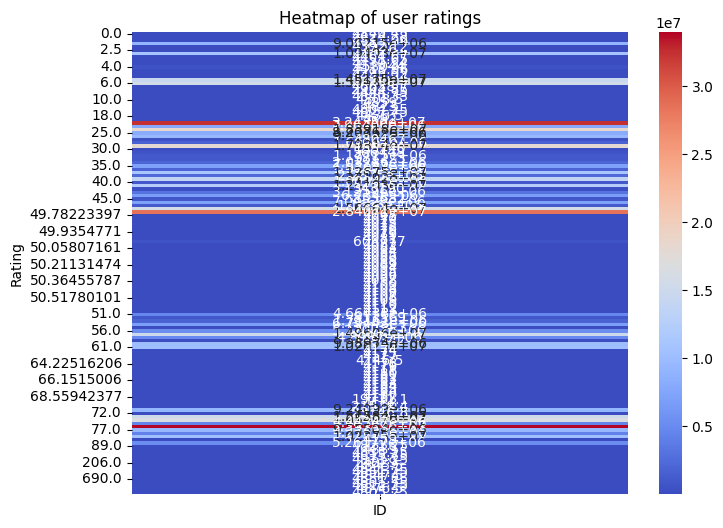

In [50]:
heatmap_data=data.pivot_table('ID','Rating')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data,annot=True,fmt='g',cmap='coolwarm',cbar=True)
plt.title('Heatmap of user ratings')
plt.xlable('Rating')
plt.ylable('ID')
plt.show()

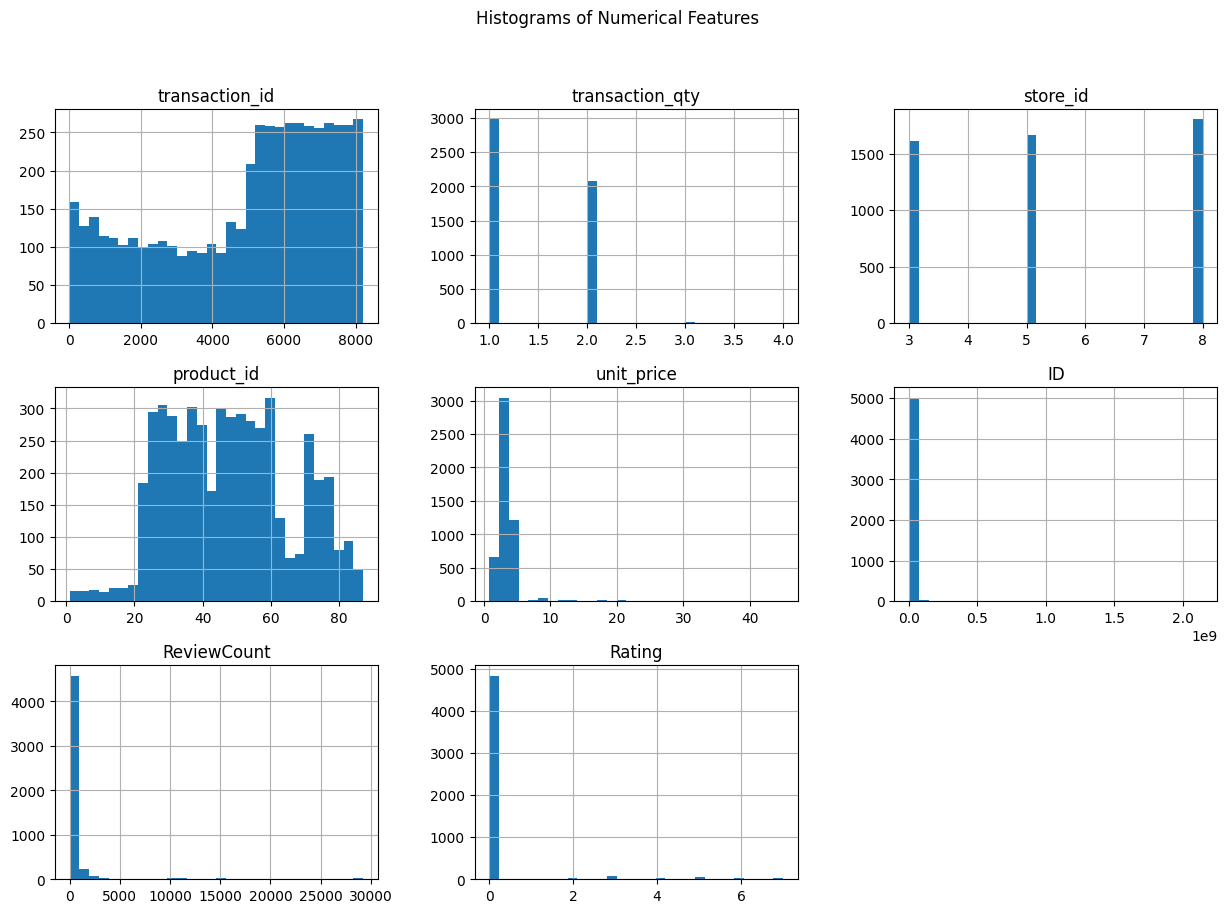

In [20]:
# Plotting distributions of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Text(0.5, 1.0, 'Most popular items')

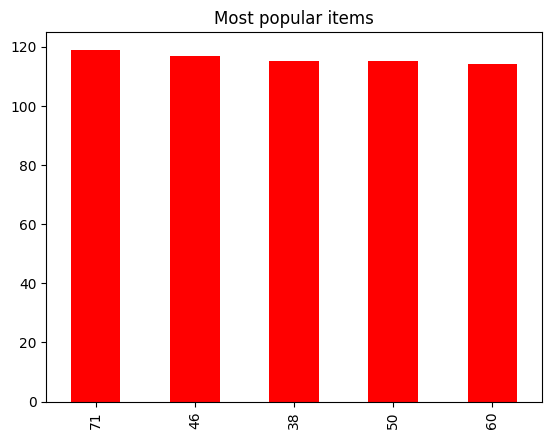

In [51]:
popular_items = data['product_id'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title('Most popular items')

<AxesSubplot:>

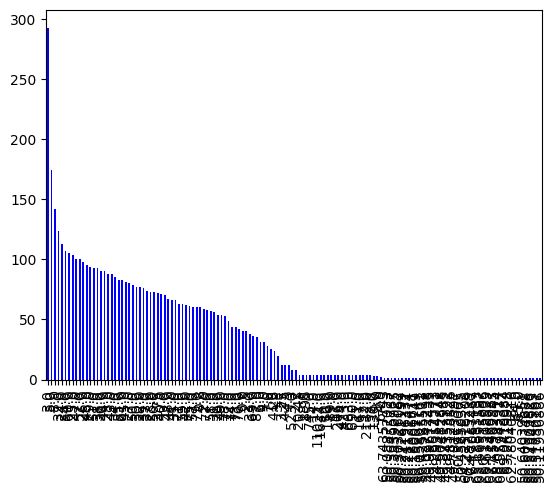

In [52]:
#most rated counts
data['Rating'].value_counts().plot(kind='bar',color='blue')

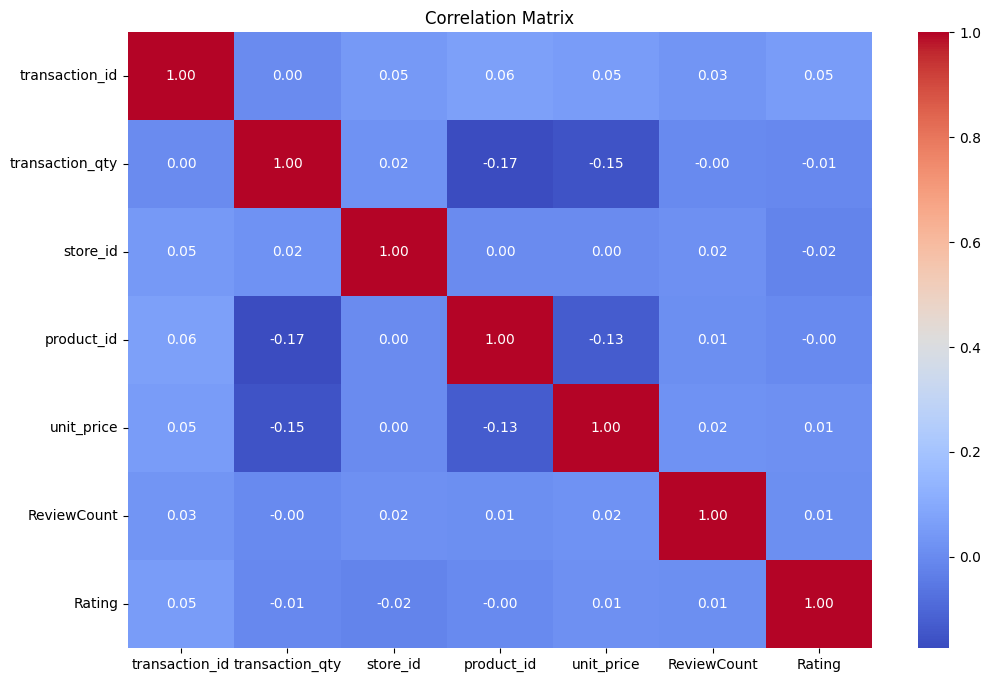

In [129]:
# Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

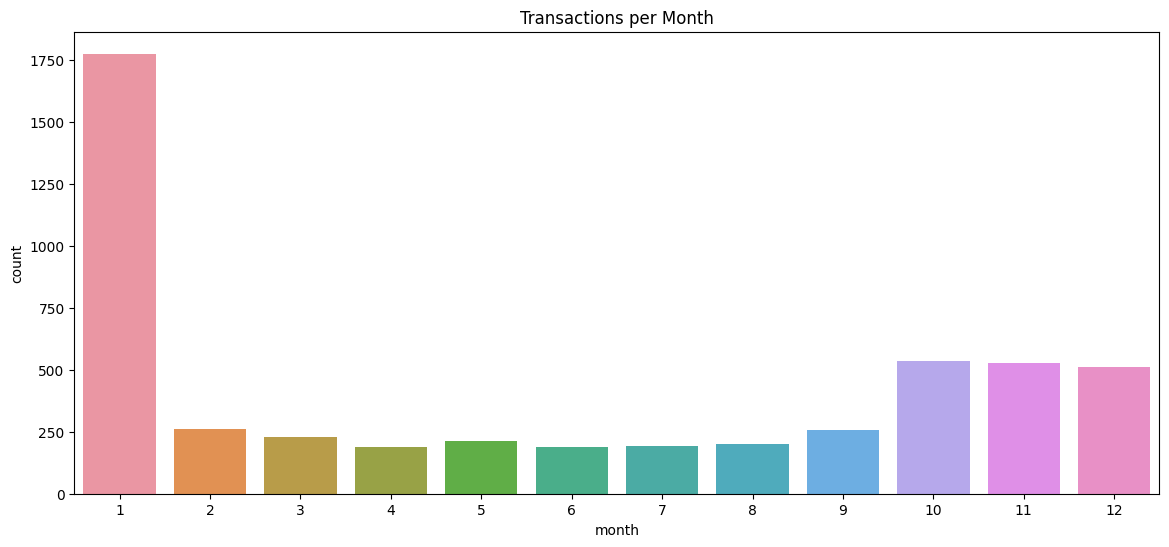

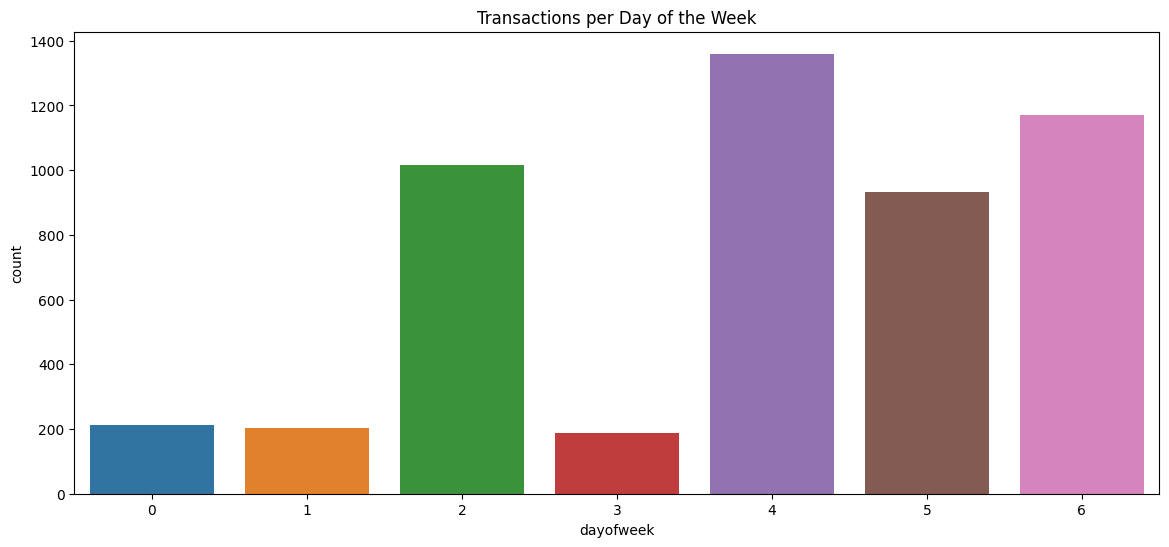

In [131]:
# Date and Time Analysis
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['transaction_time'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.time

# Analysis by Date
data['year'] = data['transaction_date'].dt.year
data['month'] = data['transaction_date'].dt.month
data['day'] = data['transaction_date'].dt.day
data['dayofweek'] =data['transaction_date'].dt.dayofweek

plt.figure(figsize=(14, 6))
sns.countplot(x='month', data=data)
plt.title('Transactions per Month')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='dayofweek', data=data)
plt.title('Transactions per Day of the Week')
plt.show()

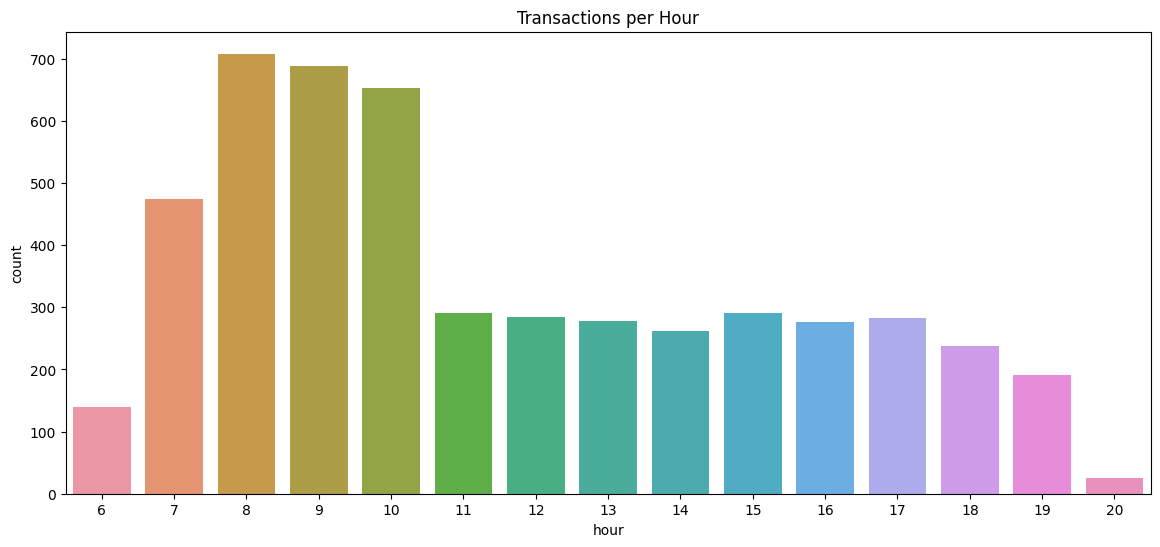

In [132]:
# Analysis by Time
data['hour'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(14, 6))
sns.countplot(x='hour', data=data)
plt.title('Transactions per Hour')
plt.show()

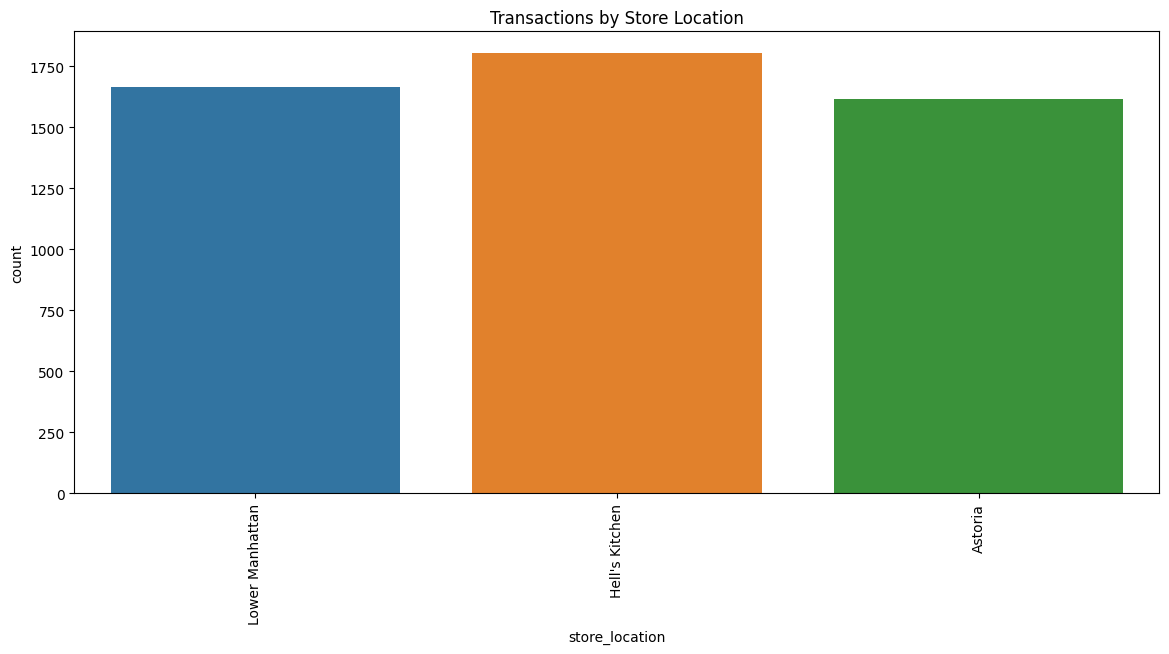

In [133]:
# Transactions by Store Location
plt.figure(figsize=(14, 6))
sns.countplot(x='store_location', data=data)
plt.title('Transactions by Store Location')
plt.xticks(rotation=90)
plt.show()

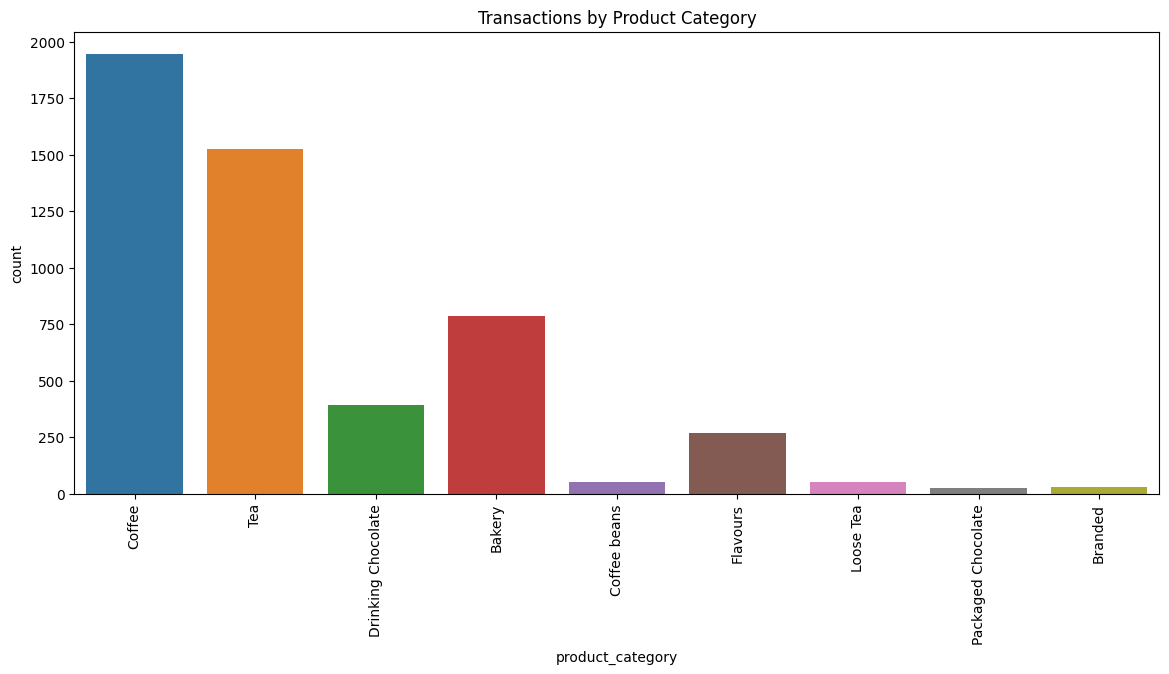

In [134]:
# Transactions by Product Category
plt.figure(figsize=(14, 6))
sns.countplot(x='product_category', data=data)
plt.title('Transactions by Product Category')
plt.xticks(rotation=90)
plt.show()

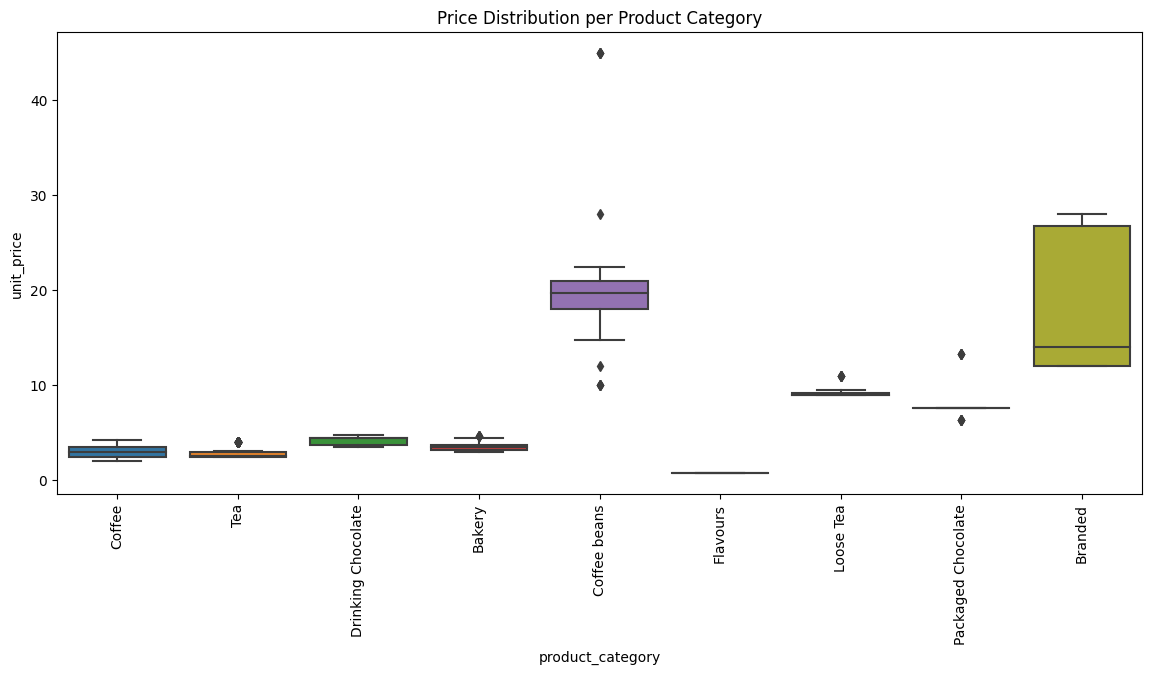

In [135]:
# Boxplot to analyze Price distribution per Product Category
plt.figure(figsize=(14, 6))
sns.boxplot(x='product_category', y='unit_price', data=data)
plt.title('Price Distribution per Product Category')
plt.xticks(rotation=90)
plt.show()

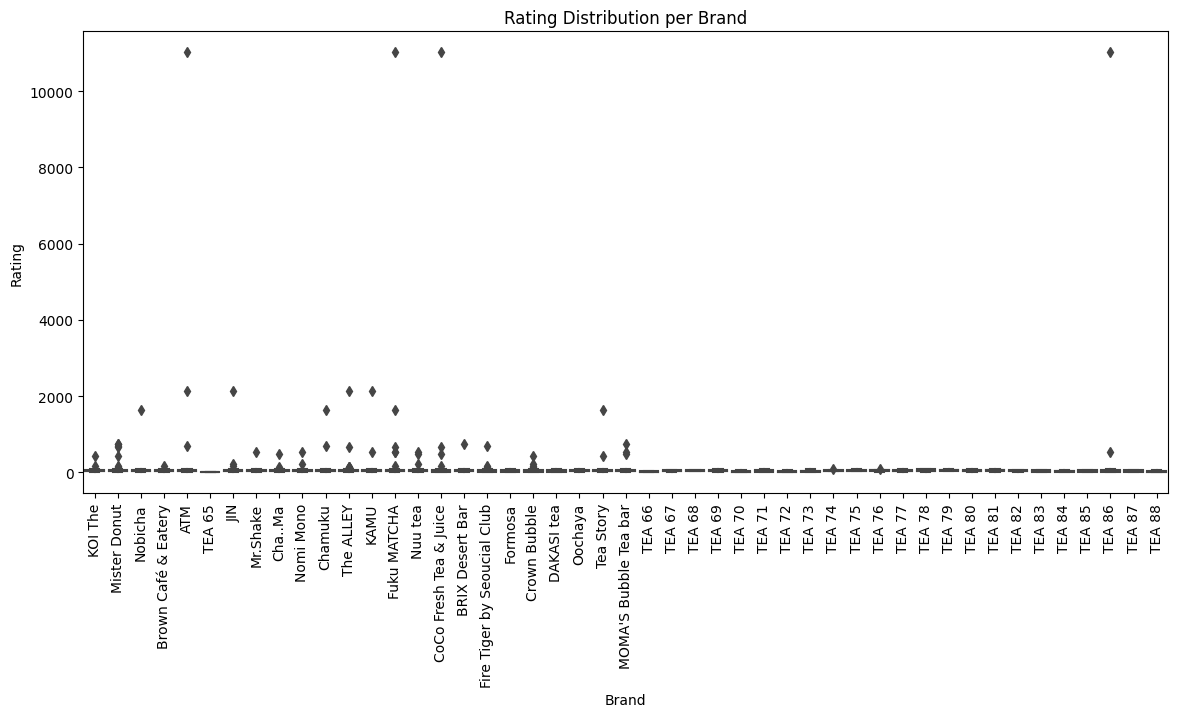

In [136]:
# Rating distribution per Brand
plt.figure(figsize=(14, 6))
sns.boxplot(x='Brand', y='Rating', data=data)
plt.title('Rating Distribution per Brand')
plt.xticks(rotation=90)
plt.show()

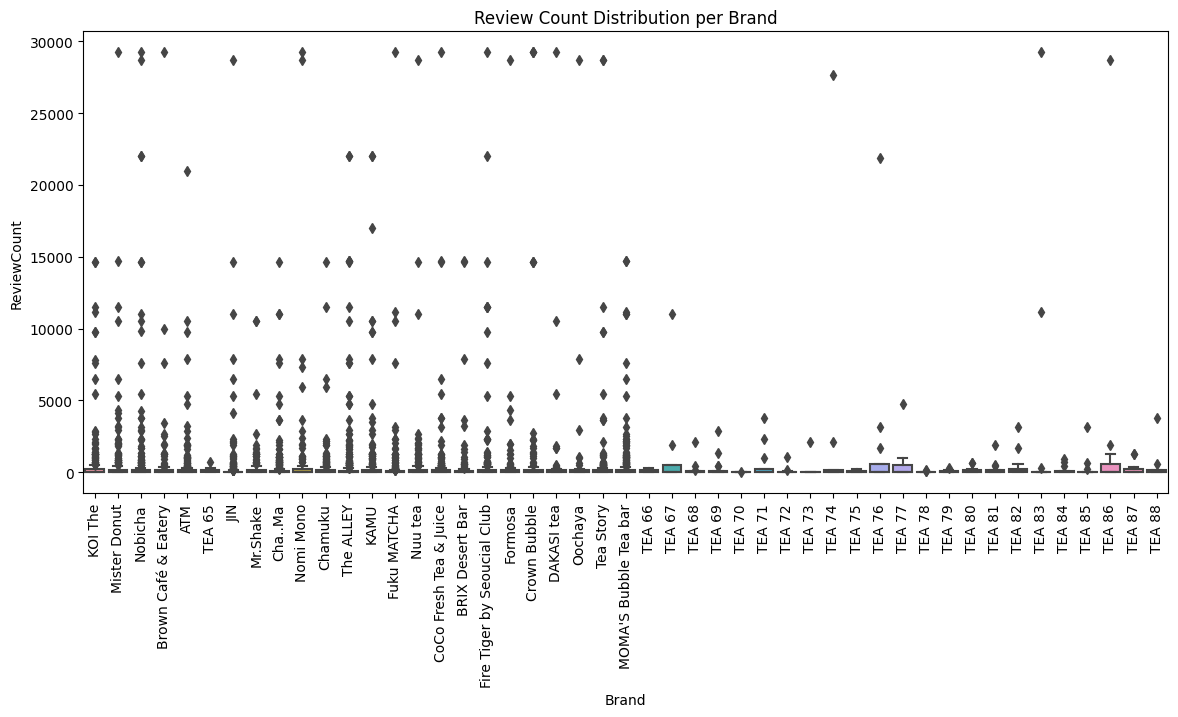

In [137]:
# Review Count Distribution per Brand
plt.figure(figsize=(14, 6))
sns.boxplot(x='Brand', y='ReviewCount', data=data)
plt.title('Review Count Distribution per Brand')
plt.xticks(rotation=90)
plt.show()

Data cleaning and tag creations

Rating based reccommendation system

import pandas as pd
data=pd.read_csv('TeaShop.csv')

average_ratings = data.groupby(['product_type','ReviewCount','Brand'])['Rating'].mean().reset

 Preprocess the Data

In [54]:
# Fill missing ReviewCount with 0 and Rating with the median value
data['ReviewCount'].fillna(0, inplace=True)
data['Rating'].fillna(data['Rating'].median(), inplace=True)

# Combine relevant columns into a single string for content-based filtering
data['content'] = data['product_detail'] + ' ' + data['product_category'] + ' ' + data['product_type'] + ' ' + data['Brand'] + ' ' +data['Rating'].astype(str)

# Optional: Lowercase and remove any punctuation
data['content'] = data['content'].str.lower()


In [55]:
print(data)

      transaction_id transaction_date transaction_time  transaction_qty  \
0                  1       01-01-2023         07:06:11                2   
1                  2       01-01-2023         07:08:56                2   
2                  3       01-01-2023         07:14:04                2   
3                  4       01-01-2023         07:20:24                1   
4                  5       01-01-2023         07:22:41                2   
...              ...              ...              ...              ...   
5075            8208       15-01-2023         10:34:45                2   
5076            8209       15-01-2023         10:36:27                2   
5077            8210       15-01-2023         10:37:45                1   
5078            8211       15-01-2023         10:37:50                1   
5079            8212       15-01-2023         10:37:50                1   

      store_id   store_location  product_id  unit_price    product_category  \
0            5  Lowe

Vectorize the Text Data

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a count vectorizer
vectorizer = CountVectorizer(stop_words='english')
count_matrix = vectorizer.fit_transform(data['content'])


Compute the Cosine Similarity  between the products.

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)


Create the Recommendation Function
Create a function to get recommendations based on a given product.

In [58]:
# Function to get product recommendations
def get_recommendations(product_id, cosine_sim=cosine_sim):
    if product_id not in data['product_id'].values:
        print(f"Product ID {product_id} not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame
    # Get the index of the product
    idx = data[data['product_id'] == product_id].index[0]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return data.iloc[product_indices]

#Test the Recommendation System
#Test the recommendation system with a specific product ID.
product_id = 56
recommended_products = get_recommendations(56)
print(recommended_products)


      transaction_id transaction_date transaction_time  transaction_qty  \
3415            6465       12-01-2023         12:39:54                1   
3685            6747       13-01-2023         08:16:20                2   
1236            2895       06-01-2023         11:56:39                2   
3018            6051       11-01-2023         17:09:36                1   
3906            6984       13-01-2023         10:28:39                1   
19                22       01-01-2023         08:24:26                2   
139              232       01-01-2023         13:17:30                1   
3405            6455       12-01-2023         12:03:30                2   
3688            6750       13-01-2023         08:19:26                2   
4587            7703       14-01-2023         13:39:59                2   

      store_id   store_location  product_id  unit_price product_category  \
3415         8   Hell's Kitchen          56        2.55              Tea   
3685         8   Hell'

In [59]:
# Calculate the average rating for each product
average_ratings = data.groupby('product_id')['Rating'].mean().reset_index()

top_rated_item=average_ratings.sort_values(by='Rating',ascending=False)
rating_base_recommendation=top_rated_item.head(10)

In [60]:
rating_base_recommendation

,product_id,Rating
12,13,1489.656250
77,83,234.340909
74,79,191.411972
56,57,154.465373
30,31,152.698980
67,72,69.483333
31,32,67.280303
63,65,65.937139
54,55,61.511385
32,33,57.355882


In [61]:
rating_base_recommendation['Rating']=rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount']=rating_base_recommendation['Rating'].astype(int)

c:\users\ipal2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ipal2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
print("Rating Base Recommendation system:(trending products)")
rating_base_recommendation[['product_type','Rating','Brand']]=rating_base_recommendation
rating_base_recommendation

Rating Base Recommendation system:(trending products)


c:\users\ipal2\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,product_id,Rating,ReviewCount,product_type,Brand
12,13,1489,1489,13,1489
77,83,234,234,83,234
74,79,191,191,79,191
56,57,154,154,57,154
30,31,152,152,31,152
67,72,69,69,72,69
31,32,67,67,32,67
63,65,65,65,65,65
54,55,61,61,55,61
32,33,57,57,33,57


Content Based Recommendation System(User Preference or item similarities)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)


In [63]:
data.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,ID,ReviewCount,Brand,Rating,content
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1705736792,0.0,KOI The,5.0,ethiopia rg coffee gourmet brewed coffee koi t...
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,95,0.0,Mister Donut,3.0,spicy eye opener chai lg tea brewed chai tea m...


CONTENT BASED RECOMMENDATION SYSTEM

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content=tfidf_vectorizer.fit_transform(data['content'])
cosine_similarities_content=cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [68]:
cosine_similarities_content

array([[1.        , 0.02892307, 0.        , ..., 0.0903158 , 0.5391974 ,
        0.        ],
       [0.02892307, 1.        , 0.03470408, ..., 0.11201181, 0.02018886,
        0.        ],
       [0.        , 0.03470408, 1.        , ..., 0.        , 0.        ,
        0.6550996 ],
       ...,
       [0.0903158 , 0.11201181, 0.        , ..., 1.        , 0.06304217,
        0.        ],
       [0.5391974 , 0.02018886, 0.        , ..., 0.06304217, 1.        ,
        0.        ],
       [0.        , 0.        , 0.6550996 , ..., 0.        , 0.        ,
        1.        ]])

In [70]:
data['product_type'][0]

'Gourmet brewed coffee'

In [95]:
item_name='Gourmet brewed coffee'
content_based_recommendation=data[data['product_type']==item_name]

In [96]:
item_name='Gourmet brewed coffee'
item_index=data[data['product_type']==item_name].index[0]

In [75]:
similar_items=list(enumerate(cosine_similarities_content[item_index]))

[(0, 1.0),
 (1, 0.028923065226003856),
 (2, 0.0),
 (3, 0.14700524224525463),
 (4, 0.03018105818544966),
 (5, 0.0),
 (6, 0.1783917130258919),
 (7, 0.31964882703206776),
 (8, 0.17659008782880176),
 (9, 0.045682594626411374),
 (10, 0.08260536037934765),
 (11, 0.038589270350676386),
 (12, 0.030332191549567872),
 (13, 0.02768263464076047),
 (14, 0.0),
 (15, 0.08313529204786232),
 (16, 0.0),
 (17, 0.16069774448937105),
 (18, 0.6265938433141295),
 (19, 0.08391529288161367),
 (20, 0.0),
 (21, 0.09656372194155063),
 (22, 0.029719709926530793),
 (23, 0.12503066973715948),
 (24, 0.31488765084346876),
 (25, 0.2660952919506905),
 (26, 0.41984571931123893),
 (27, 0.08285449962639321),
 (28, 0.3598880785020594),
 (29, 0.028349592233288833),
 (30, 0.04227149665436317),
 (31, 0.0363912219115169),
 (32, 0.1716569495734896),
 (33, 0.0),
 (34, 0.0),
 (35, 0.10408872607272002),
 (36, 0.07986682788667503),
 (37, 0.23414809754139226),
 (38, 0.06960503843993673),
 (39, 0.027445482869742258),
 (40, 0.031082129

In [97]:
similar_items=list(enumerate(cosine_similarities_content[item_index]))
similar_items=sorted(similar_items,key=lambda x:x[1],reverse=True)
top_similar_items=similar_items[1:10]

recommended_items_indices= [x[0] for x in top_similar_items]

In [98]:
data.iloc[recommended_items_indices]['product_type']

140     Gourmet brewed coffee
914     Gourmet brewed coffee
1637    Gourmet brewed coffee
4370    Gourmet brewed coffee
3298    Gourmet brewed coffee
2916    Gourmet brewed coffee
59      Gourmet brewed coffee
1597    Gourmet brewed coffee
3554    Gourmet brewed coffee
Name: product_type, dtype: object

In [99]:
data.iloc[recommended_items_indices]['Brand']

140       KOI The
914       KOI The
1637      KOI The
4370      KOI The
3298      KOI The
2916      KOI The
59      The ALLEY
1597      KOI The
3554      Nobicha
Name: Brand, dtype: object

In [100]:
data['product_type']

0       Gourmet brewed coffee
1             Brewed Chai tea
2               Hot chocolate
3                 Drip coffee
4             Brewed Chai tea
                ...          
5075          Brewed Chai tea
5076         Brewed Black tea
5077        Brewed herbal tea
5078    Gourmet brewed coffee
5079       Drinking Chocolate
Name: product_type, Length: 5080, dtype: object

COLLABORATIVE BASED RECOMMENDATION SYSTEM

In [107]:
user_item_matrix=data.pivot_table(index='ID', columns='product_id',values='Rating',aggfunc='mean').fillna(0)

In [109]:
user_similarity=cosine_similarity(user_item_matrix)

In [114]:
target_user_id = '5'

target_user_index=user_item_matrix.index.get_loc(target_user_id)

In [118]:
user_similarities=user_similarity[target_user_index]
similar_user_indices=user_similarities.argsort()[::-1][1:]

In [126]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user= user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0)&(user_item_matrix.iloc[target_user_index]==0)
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])
recommended_item_details=data[data['product_id'].isin(recommend_items)]  [['product_type','ReviewCount','Brand','Rating']] 

In [127]:
recommended_item_details

,product_type,ReviewCount,Brand,Rating
1381,Gourmet Beans,312.0,Mister Donut,54.000000
1387,Organic Beans,0.0,The ALLEY,78.000000
1430,Organic Beans,0.0,KOI The,45.000000
1450,Gourmet Beans,0.0,Formosa,57.000000
1459,Green beans,1.0,CoCo Fresh Tea & Juice,35.000000
1603,Organic Beans,0.0,Chamuku,26.000000
1726,Herbal tea,0.0,Fuku MATCHA,55.000000
1729,Organic Beans,767.0,Mister Donut,43.000000
1739,Gourmet Beans,5.0,Nomi Mono,24.000000
1800,Gourmet Beans,2249.0,Fire Tiger by Seoucial Club,40.000000


Functions that recommend items